<a href="https://colab.research.google.com/github/jeffheaton/app_generative_ai/blob/main/assignments/assignment_yourname_t81_559_class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-559: Applications of Generative AI
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/index.html)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/).

**Module 2 Assignment: Code Generation**

**Student Name: Your Name**

# Assignment Instructions

Develop a prompt that will generate an image similar to this one. Your image does not need to look exactly like this one, but important detals, such as the colors, counts, and positions of items are required.  Make sure to also include the prompt as a Python comment string, such as:

"""Prompt: Please write python code to do this....."""

![Assignment 2](https://s3.amazonaws.com/data.heatonresearch.com/images/wustl/app_genai/assignments/t81_559_assignment_2.jpg)

The submit function accepts a PIL image, so it is suggested you use the PIL image library. The idea here is not for you to learn to write Python image rendering, but to have a prompt do the work for you.

# Google CoLab Instructions

If you are using Google CoLab, it will be necessary to mount your GDrive so that you can send your notebook during the submit process.  Running the following code will map your GDrive to ```/content/drive```.

In [ ]:
try:
  from google.colab import drive, userdata
  drive.mount('/content/drive', force_remount=True)
  COLAB = True
  print("Note: using Google CoLab")
except:
  print("Note: not using Google CoLab")
  COLAB = False

# Assignment Submission Key - Was sent you first week of class.
# If you are in both classes, this is the same key.
if COLAB:
  # For Colab, add to your "Secrets" (key icon at the left)
  key = userdata.get('T81_559_KEY')
else:
  # If not colab, enter your key here, or use an environment variable.
  # (this is only an example key, use yours)
  key = ""

Mounted at /content/drive
Note: using Google CoLab


If you are running this notebook with CoLab, the following command will show you your notebooks. You will need to know the location of your notebook when you submit your assignment.

In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

514HW2.ipynb			     assignment_ZhijiangLi_class7.ipynb
514HW2_Q3.ipynb			     assignment_ZhijiangLi_class8.ipynb
assignment_ZhijiangLi_class10.ipynb  assignment_ZhijiangLi_class9.ipynb
assignment_ZhijiangLi_class1.ipynb   assignment_ZhijiangLi_t81_559_class1.ipynb
assignment_ZhijiangLi_class2.ipynb   assignment_ZhijiangLi_t81_559_class2.ipynb
assignment_ZhijiangLi_class3.ipynb   DataMining514
assignment_ZhijiangLi_class4.ipynb   KaggleTest.ipynb
assignment_ZhijiangLi_class5.ipynb   Untitled0.ipynb
assignment_ZhijiangLi_class6.ipynb


# Assignment Submit Function

You will submit the ten programming assignments electronically.  The following **submit** function can be used to do this.  My server will perform a basic check of each assignment and let you know if it sees any underlying problems.

**It is unlikely that should need to modify this function.**

In [ ]:
import base64
import os
import numpy as np
import pandas as pd
import requests
import PIL
import PIL.Image
import io
from typing import List, Union

# This function submits an assignment.  You can submit an assignment as much as you like, only the final
# submission counts.  The paramaters are as follows:
# data - List of pandas dataframes or images.
# key - Your student key that was emailed to you.
# course - The course that you are in, currently t81-558 or t81-559.
# no - The assignment class number, should be 1 through 10.
# source_file - The full path to your Python or IPYNB file.  This must have "_class1" as part of its name.
# .             The number must match your assignment number.  For example "_class2" for class assignment #2.

def submit(
    data: List[Union[pd.DataFrame, PIL.Image.Image]],
    key: str,
    course: str,
    no: int,
    source_file: str = None
) -> None:
    if source_file is None and '__file__' not in globals():
        raise Exception("Must specify a filename when in a Jupyter notebook.")
    if source_file is None:
        source_file = __file__

    suffix = f'_class{no}'
    if suffix not in source_file:
        raise Exception(f"{suffix} must be part of the filename.")

    ext = os.path.splitext(source_file)[-1].lower()
    if ext not in ['.ipynb', '.py']:
        raise Exception(f"Source file is {ext}; must be .py or .ipynb")

    with open(source_file, "rb") as file:
        encoded_python = base64.b64encode(file.read()).decode('ascii')

    payload = []
    for item in data:
        if isinstance(item, PIL.Image.Image):
            buffered = io.BytesIO()
            item.save(buffered, format="PNG")
            payload.append({'PNG': base64.b64encode(buffered.getvalue()).decode('ascii')})
        elif isinstance(item, pd.DataFrame):
            payload.append({'CSV': base64.b64encode(item.to_csv(index=False).encode('ascii')).decode("ascii")})
        else:
            raise ValueError(f"Unsupported data type: {type(item)}")

    response = requests.post(
        "https://api.heatonresearch.com/wu/submit",
        headers={'x-api-key': key},
        json={
            'payload': payload,
            'assignment': no,
            'course': course,
            'ext': ext,
            'py': encoded_python
        }
    )

    if response.status_code == 200:
        print(f"Success: {response.text}")
    else:
        print(f"Failure: {response.text}")

# Assignment #2 Sample Code

For assignment #2 I will give you starting code that renders the wrong sort of image, however, it goes through all the necessary steps. The first step is to develop a prompt, such as:

```
Write a Python program that draws a 600x600 image, with a 8-pointed white star with a black background, the star should be hollow, with a line-width of 7. Use PIL to render it.
```

Then use chatgpt-4o-mini to create the code.

In [ ]:
# '''Prompt: Write a Python program that draws a 600x600 image, with a 8-pointed
# white star with a black background, the star should be hollow, with a line-width
# of 7. Use PIL to render it.
# '''

# from PIL import Image, ImageDraw
# import math

# # Function to draw an 8-pointed star
# def draw_star(draw, center, radius, color, line_width):
#     points = []
#     for i in range(16):  # 16 points needed for an 8-pointed star
#         angle = math.pi / 8 * i  # Calculate the angle
#         r = radius if i % 2 == 0 else radius / 2  # Alternate between outer and inner points
#         x = center[0] + r * math.cos(angle)
#         y = center[1] + r * math.sin(angle)
#         points.append((x, y))

#     draw.polygon(points, outline=color, width=line_width)

# # Create a black background image
# image_size = (600, 600)
# image = Image.new("RGB", image_size, "black")
# draw = ImageDraw.Draw(image)

# # Define the star parameters
# center = (300, 300)
# radius = 200
# color = "white"
# line_width = 7

# # Draw the 8-pointed star
# draw_star(draw, center, radius, color, line_width)

In [ ]:
'''Prompt: Write a Python program that draws a 640x480 image,
an white circle in the center.
Then, draw 50 horizontal bars,
the bars contain white, purple and green,
purple and green bars stop rendering in the circle and yellow bars
extend fully through the white circle. Cycling colors.
Use PIL to render it.
'''

from PIL import Image, ImageDraw

def create_image():
    width, height = 640, 480
    num_bars = 50
    bar_height = height // num_bars
    colors = [(255, 255, 0), (128, 0, 128), (0, 128, 0)]  # Yellow, Purple, Green

    image = Image.new("RGB", (width, height), "black")
    draw = ImageDraw.Draw(image)

    # Draw white circle in the center
    center_x, center_y = width // 2, height // 2
    radius = min(width, height) // 4
    draw.ellipse([(center_x - radius, center_y - radius), (center_x + radius, center_y + radius)], fill="white")

    # Draw cycling color bars, stopping purple and green in the circle, yellow extends through
    for i in range(num_bars):
        y1, y2 = i * bar_height, (i + 1) * bar_height
        color = colors[i % 3]
        if color == (128, 0, 128) or color == (0, 128, 0):  # Purple or Green
            draw.rectangle([(0, y1), (center_x - radius, y2)], fill=color)
            draw.rectangle([(center_x + radius, y1), (width, y2)], fill=color)
        else:  # Yellow bars extend fully
            draw.rectangle([(0, y1), (width, y2)], fill=color)

    image.show()

create_image()



Quick code to render what you drew.

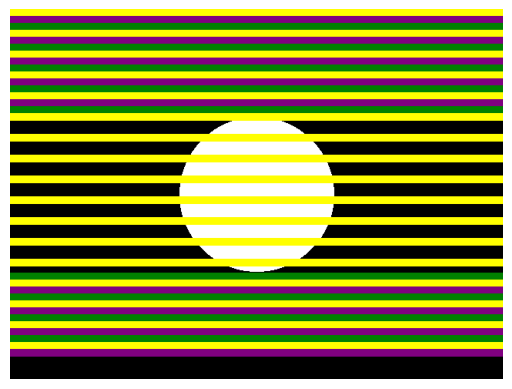

In [ ]:
import matplotlib.pyplot as plt

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
# You must identify your source file.  (modify for your local setup)
# file="/content/drive/My Drive/Colab Notebooks/assignment_yourname_t81_559_class2.ipynb"  # Google CoLab
# file='C:\\Users\\jeffh\\projects\\t81_559_deep_learning\\assignments\\assignment_yourname_t81_559_class2.ipynb'  # Windows
# file='/Users/jheaton/projects/t81_559_deep_learning/assignments/assignment_yourname_t81_559_class2.ipynb'  # Mac/Linux


file="/content/drive/My Drive/Colab Notebooks/assignment_ZhijiangLi_t81_559_class2.ipynb"


submit(source_file=file,data=[image],key=key,no=2, course='t81-559')

Success: Submitted Assignment 2 (t81-559) for l.zhijiang:
You have submitted this assignment 10 times. (this is fine)
Based on the provided image and code, here's an evaluation of whether the program/image achieved each of the requested items:
Item 1: Yes. The image is created with dimensions 640x480 as specified in the code.
Item 2: Yes. The code creates 50 horizontal bars that cycle between yellow, purple, and green colors.
Item 3: Yes. A white circle is drawn in the center of the image with a radius of min(width, height) // 4, which would be approximately 100 pixels wide.
Item 4: Yes. The code specifically handles yellow bars to extend fully across the image, while purple and green bars stop at the edges of the circle.
Item 5: Yes. The code includes a comment with a "Prompt:" that describes the image generation task, which could be used as an LLM prompt to generate similar code.
Notes: The implementation closely follows the requirements, creating the specified image with all the req